In [1]:
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
import codecs
from collections import Counter, defaultdict
from matplotlib import pyplot as plt
import time
datasets_path = 'C:/Users/OptimusPrime/Desktop/Studia/NLP1/Natural-Language-Processing-1/Week 5/Data'

In [2]:
with codecs.open(datasets_path + '\\pap.txt', 'r', 'utf-8') as f:
    text = f.read().lower()
    preprocessed_text = re.sub(r'#\d+', '##', text)
    preprocessed_text = re.sub(r'\n', ' ', preprocessed_text)
    preprocessed_text = re.sub(r'[\\,.\-\'\"()?:;+\/\d+&`!\[\]@<>%*~{}=\x96\x84\x8c\x9c\x9f\x92\x80]', '', preprocessed_text)
    preprocessed_text = re.sub(r'[\xbc-\xff]', '', preprocessed_text)
    preprocessed_text = re.sub(r'   ', '  ', preprocessed_text)
    preprocessed_text = re.sub(r'  ', ' ', preprocessed_text)
    splitted_notes = np.array(preprocessed_text.split('##'))

In [3]:
tf = TfidfVectorizer(max_df=3000, min_df=6, token_pattern='(?u)\\b\\w+\\b')
freq_matr = tf.fit_transform(splitted_notes)
freq_matr

<51557x37529 sparse matrix of type '<class 'numpy.float64'>'
	with 1818797 stored elements in Compressed Sparse Row format>

In [4]:
frequency_matrix = freq_matr.toarray()
chosen_note = frequency_matrix[2634].astype(bool)

In [5]:
start = time.time()
dice_similarity_vector = [pairwise_distances([chosen_note, note], metric='dice')[0][1] for note in frequency_matrix.astype(bool)]
print("Time:" + str(time.time() - start))

Time:43.558661222457886


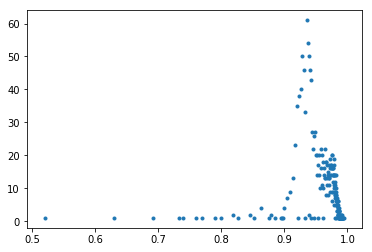

In [6]:
dice_distribution = Counter([metric for metric in dice_similarity_vector if metric != 1.0 and metric != 0.0])
plt.scatter(list(dice_distribution.keys()), list(dice_distribution.values()), s=9)
plt.show()

In [7]:
indices = dict()
indices['tfidf'] = list()
indices['graph3'] = list()
indices['graph4'] = list()
indices['graph5'] = list()
for i in range(len(dice_similarity_vector)):
    if dice_similarity_vector[i] < 0.86:
        indices['tfidf'].append(i)
print("Number of similar notes: " + str(len(indices['tfidf'])))

Number of similar notes: 16


In [8]:
del frequency_matrix

In [9]:
cv = CountVectorizer(max_df=3000, min_df=6, token_pattern='(?u)\\b\\w+\\b')
cv_freq_matrix = cv.fit_transform(splitted_notes)
words = cv.get_feature_names()
occurence_number = cv_freq_matrix.sum(axis=0).A1
len(cv.stop_words_)
stop_list = cv.stop_words_

In [10]:
occurence_number, words = (list(t) for t in zip(*sorted(zip(occurence_number, words), reverse=True)))

In [11]:
cv_freq_matrix

<51557x37529 sparse matrix of type '<class 'numpy.int64'>'
	with 1818797 stored elements in Compressed Sparse Row format>

In [12]:
def delete_banned_words(matchobj):
    word = matchobj.group(0)
    if word.lower() in banned_words:
        return ""
    else:
        return word

banned_words = stop_list
word_pattern = re.compile('\w+')
graph_notes = list()
for sentence in splitted_notes:
    graph_notes.append(word_pattern.sub(delete_banned_words, sentence).split())    

In [13]:
encoder= {k: v for (k, v) in zip(words, range(len(words)))}

In [14]:
def transform_from_words_note_to_graph_vector(graph_note, n):
    note_matrix_dict = defaultdict(int)
    note_len = len(graph_note)
    if note_len == n-4 or note_len == n-3 or note_len == n-2 or note_len == n-1:
        return defaultdict(int)
    for i in range(note_len):
        if i == note_len - (n -1):
            break;  
        for j in range(n-1):
            note_matrix_dict[(encoder[graph_note[i]], encoder[graph_note[i+1+j]])] += 1
    return note_matrix_dict

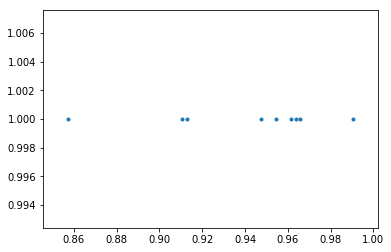

In [15]:
chosen_note = transform_from_words_note_to_graph_vector(graph_notes[2634], 3)
dice_metric = list()
for note in graph_notes:
    test_note = transform_from_words_note_to_graph_vector(note, 3)
    X_Y = 0
    X = len(test_note)
    Y = len(chosen_note)
    for key in chosen_note:
        if key in test_note:
            X_Y += 1
    dice_metric.append(1-(2*X_Y/(X+Y)))

dice_distribution = Counter([metric for metric in dice_metric if metric != 1.0 and metric != 0.0])
plt.scatter(list(dice_distribution.keys()), list(dice_distribution.values()), s=9)
plt.show()

In [16]:
for i in range(len(dice_metric)):
    if dice_metric[i] < 0.9999:
        indices['graph3'].append(i)
print("Number of similar notes: " + str(len(indices['graph3'])))

Number of similar notes: 10


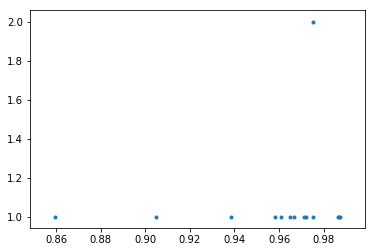

In [26]:
chosen_note = transform_from_words_note_to_graph_vector(graph_notes[2634], 4)
dice_metric = list()
for note in graph_notes:
    test_note = transform_from_words_note_to_graph_vector(note, 4)
    X_Y = 0
    X = len(test_note)
    Y = len(chosen_note)
    for key in chosen_note:
        if key in test_note:
            X_Y += 1
    dice_metric.append(1-(2*X_Y/(X+Y)))

dice_distribution = Counter([metric for metric in dice_metric if metric != 1.0 and metric != 0.0])
plt.scatter(list(dice_distribution.keys()), list(dice_distribution.values()), s=9)
plt.show()

In [27]:
for i in range(len(dice_metric)):
    if dice_metric[i] < 0.9999:
        indices['graph4'].append(i)
print("Number of similar notes: " + str(len(indices['graph4'])))

Number of similar notes: 32


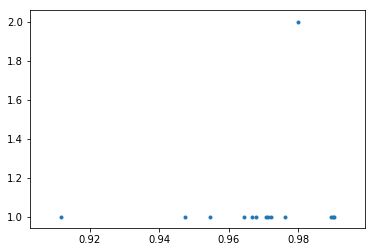

In [35]:
chosen_note = transform_from_words_note_to_graph_vector(graph_notes[2634], 5)
dice_metric = list()
for note in graph_notes:
    test_note = transform_from_words_note_to_graph_vector(note, 5)
    X_Y = 0
    X = len(test_note)
    Y = len(chosen_note)
    for key in chosen_note:
        if key in test_note:
            X_Y += 1
    dice_metric.append(1-(2*X_Y/(X+Y)))

dice_distribution = Counter([metric for metric in dice_metric if metric != 1.0 and metric != 0.0])
plt.scatter(list(dice_distribution.keys()), list(dice_distribution.values()), s=9)
plt.show()

In [36]:
for i in range(len(dice_metric)):
    if dice_metric[i] < 0.9999:
        indices['graph5'].append(i)
print("Number of similar notes: " + str(len(indices['graph5'])))

Number of similar notes: 48


In [37]:
all_indices = set()
for key in indices:
    for val in indices[key]:
        all_indices.add(val)


In [38]:
all_indices

{1596,
 1866,
 1938,
 2634,
 4989,
 11089,
 12517,
 13853,
 14917,
 17486,
 18345,
 19409,
 20811,
 21422,
 23563,
 23960,
 25225,
 37385,
 38420,
 40130,
 45970}

In [39]:
for ind in all_indices:
    print('\n'+splitted_notes[ind])


 polskie przyrządy wejdą w skład wyposażenia satelity intergral ktry zostanie wyniesiony na orbitę w kwietniu poinformował pap dyrektor centrum badań kosmicznych pan prof zbigniew kłos 

 w indiach udało się wystrzelić rakietę nośną gslv zdolną wynosić satelity na orbitę geostacjonarną podała państwowa agencja prasowa pti 

 europejska rakieta nośna ariane wyniosła w nocy ze środy na czwartek na orbitę cztery satelity o rekordowej wadze łącznie tony 

 rakieta taurus wystrzelona w niedzielę z bazy lotnictwa wojskowego vandenberg w kalifornii wyniosła na orbitę satelitę mti ktry będzie przez trzy lata obserwował zmiany fal elektromagnetycznych w atmosferze ziemi 

 rakieta ariane wystrzelona w nocy z czwartku na piątek z kosmodromu na gujanie francuskiej nie zdoła wynieść na właściwą orbitę dwch satelitw telekomunikacyjnych 

 amerykańska agencja kosmiczna nasa przedłużyła o dwa dni pobyt na orbicie wahadłowca endeavour i zapowiedziała rozmowy z rosjanami 

 niepowodzeniem zakończyła s

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score
y = np.array([[i in indices['tfidf'], i in indices['graph3'], i in indices['graph4'], i in indices['graph5'], True] for i in all_indices])
y
    

array([[False, False,  True,  True,  True],
       [ True, False,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True, False, False, False,  True],
       [False, False,  True,  True,  True],
       [False, False,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True, False, False, False,  True],
       [ True, False, False, False,  True],
       [ True, False,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True, False, False, False,  True],
       [False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True, False,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [ True, False, False, False,  True],
       [ True,  True,  True,  True,  True]])

In [41]:
models = ['TfIdf', 'Graph - 3', 'Graph - 4', 'Graph - 5']
for i in range(len(y[0]) - 1):
    print(models[i])
    print('Precision: ' + str(precision_score(y[:, 4], y[:, i])))
    print('Recall: ' + str(recall_score(y[:, 4], y[:, i])))
    print('F1: ' + str(f1_score(y[:, 4], y[:, i])))
    print('')

TfIdf
Precision: 1.0
Recall: 0.7619047619047619
F1: 0.8648648648648648

Graph - 3
Precision: 1.0
Recall: 0.47619047619047616
F1: 0.6451612903225806

Graph - 4
Precision: 1.0
Recall: 0.7619047619047619
F1: 0.8648648648648648

Graph - 5
Precision: 1.0
Recall: 0.7619047619047619
F1: 0.8648648648648648

